In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import cmath
pi = np.pi
e = math.e
import sys
print ("Diseñado en python 2.7\n")
print ("No testeado para python 3\n")
print ("Kernel en ejecución: python " + sys.version)

Diseñado en python 2.7

No testeado para python 3

Kernel en ejecución: python 2.7.12 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Ejercicio 1
## Transformada de Fourier

Podemos observar como la función obtenida es real.
También se observa como al incrementar la variable T la energía disminuye.
Según aumenta el valor de w el valor tomado por la función pintada se reduce.


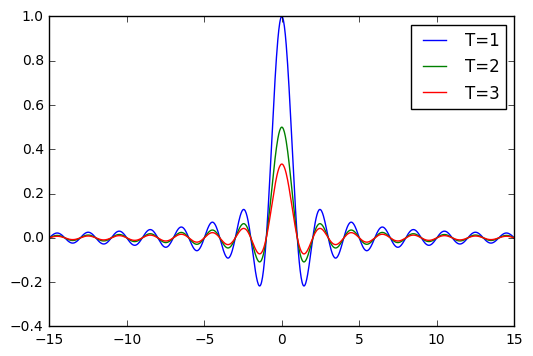

In [2]:
print ("Podemos observar como la función obtenida es real.")
print ("También se observa como al incrementar la variable T la energía disminuye.")
print ("Según aumenta el valor de w el valor tomado por la función pintada se reduce.")

x = np.linspace(-15,15,1000) # Intervalo y puntos
T=1
f1 = (1.0/T) * (np.sin(2*pi*x*0.5) / (2*pi*x*0.5) )
T=2
f2 = (1.0/T) * (np.sin(2*pi*x*0.5) / (2*pi*x*0.5) )
T=3
f3 = (1.0/T) * (np.sin(2*pi*x*0.5) / (2*pi*x*0.5) )

plt.plot(x, f1, label='T=1')
plt.plot(x, f2, label='T=2')
plt.plot(x, f3, label='T=3')
plt.legend()
plt.show()


# Ejercicio 2
## Análisis de la transformada sin calcularla

La primera función es real y par, lo que indica que su transformada también será real y par


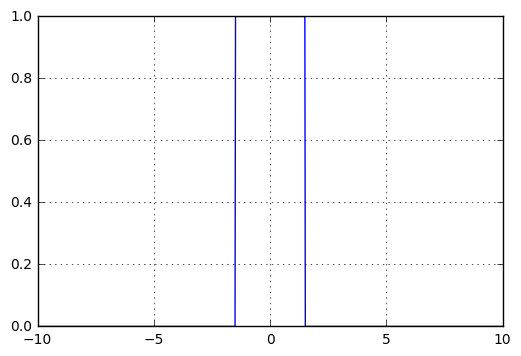

El coseno es una función real y par, la transformada también lo será


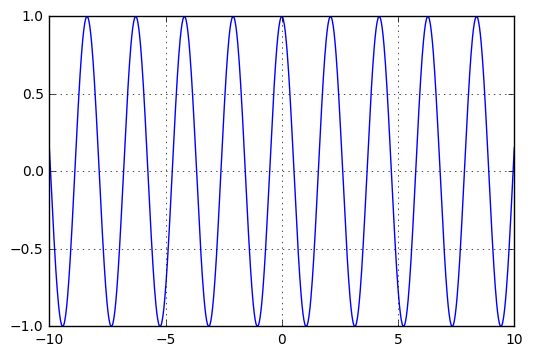

El seno es una función real e impar, por lo tanto su transformada será imaginaria e impar


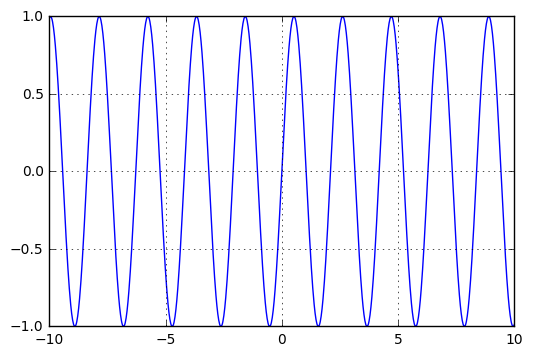

Esta última función es real y como se obsevar en la imagen par, por lo cual su transformada de fourier tendrá estas mismas condiciones


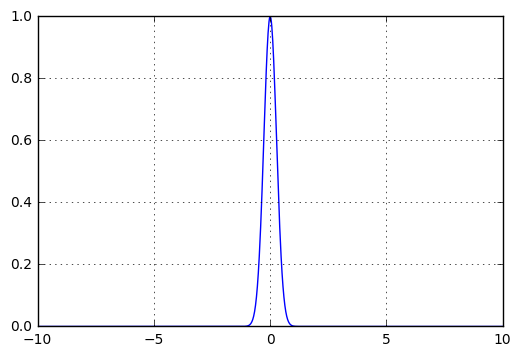

In [3]:
#Función a trozos
p=3
trozos = lambda x: np.piecewise(x, [x<p/-2.0, (p/-2.0<x) & (x<p/2.0), p/2.0<x], [0.0, 1.0, 0.0])
intervalo = np.linspace(-10, 10, 1000)
plt.plot(intervalo, trozos(intervalo))
plt.grid(True) 
print("La primera función es real y par, lo que indica que su transformada también será real y par")
plt.show()

#Coseno
w0=2
coseno = np.cos(w0*x)
plt.plot(intervalo, coseno)
plt.grid(True) 
print("El coseno es una función real y par, la transformada también lo será")
plt.show()

#Seno
w0=2
seno = np.sin(w0*x)
plt.plot(intervalo, seno)
plt.grid(True) 
print("El seno es una función real e impar, por lo tanto su transformada será imaginaria e impar")
plt.show()

#Exponencial
funce = np.e**(-p*x*x)
plt.plot(intervalo, funce)
plt.grid(True) 
print("Esta última función es real y como se obsevar en la imagen par, por lo cual su transformada de fourier tendrá estas mismas condiciones")
plt.show()


# Ejercicio 3
## Frecuencia de Nyquist
$h_c = \dfrac{1}{2\Delta}$

In [4]:
def get_intervalo_muestreo(h_c):
    return 0.5/h_c

def get_h_c(intervalo_muestreo):
    return 0.5/intervalo_muestreo
    


Para una frecuencia de Nyquist h_c=1/2pi obtenemos intervalo_muestreo=3.14159265359

Seno de fr=1/2pi


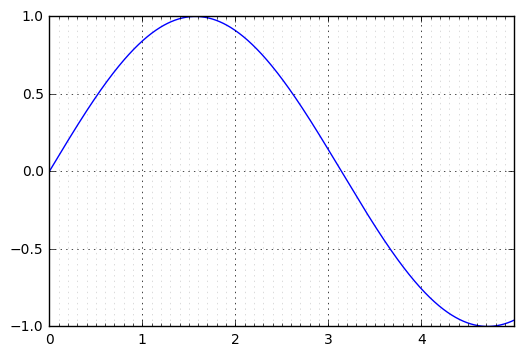

La distancia entre máximo y mínimo es pi, lo cual coincide con el intervalo de muestreo


In [5]:
seno_intervalo = get_intervalo_muestreo(0.5/pi)
print ("\nPara una frecuencia de Nyquist h_c=1/2pi obtenemos intervalo_muestreo=") + str(seno_intervalo)

print ("\nSeno de fr=1/2pi")
f  = 0.5/pi
w0 = 2.0 * pi * f
x = np.linspace(0,5,1000) # Intervalo y puntos
seno = np.sin(w0*x)
intervalo2 = np.linspace(0, 5, 1000)

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1) 
ax.plot(intervalo2, seno)
major_ticks = np.arange(0, 5, 1)                                              
minor_ticks = np.arange(0, 5, 0.1)    
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both') 
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=1.0) 
plt.show()

print ("La distancia entre máximo y mínimo es pi, lo cual coincide con el intervalo de muestreo")


# Transformada de Fourier

In [6]:
def fourier(datos):
    N = len(datos)
    res = [[0.0 for x in range(1)] for y in range(N)] 
    for i in range (N):
        for j in range (N):
            res[i] = res[i] + datos[j]*e**(2j*pi*j*i/N)
    return res

def fourier_inv(datos):
    N = len(datos)
    res = [[0.0 for x in range(1)] for y in range(N)] 
    for i in range (N):
        for j in range (N):
            res[i] = res[i] + datos[j]*e**(-2j*pi*j*i/N)
        res[i]=res[i]/N
    return res
    

### Transformada de Fourier como producto de matrices

In [2]:
def fourier_matrix(datos):
    N = len(datos)
    #Normal
    matrix = [[(math.e ** (2*pi*1j*(i*j)/N)) for i in range(N)] for j in range(N)]
    #Traspuesta
    matrix_t = [[0.0 for x in range(N)] for y in range(N)] 
    for i in range (N):
        for j in range (N):
            matrix_t[j][i]=matrix[i][j]
    #Multiplicacion
    res = [[0.0 for x in range(1)] for y in range(N)] 
    for j in range (N):
        temp=0.0
        for k in range (N):
            temp += datos[k] * matrix_t[j][k]
        res[j]=temp
    return res

def fourier_matrix_inv(datos):
    N = len(datos)
    #Normal
    matrix = [[(math.e ** (-2*pi*1j*(i*j)/N)) for i in range(N)] for j in range(N)]    
    #Traspuesta
    matrix_t = [[0.0 for x in range(N)] for y in range(N)] 
    for i in range (N):
        for j in range (N):
            matrix_t[j][i]=matrix[i][j] / N #Dividimos por ser la inversa
    #Multiplicacion
    res = [[0.0 for x in range(1)] for y in range(N)] 
    for j in range (N):
        temp=0.0
        for k in range (N):
            temp += datos[k] * matrix_t[j][k]
        res[j]=temp
    return res

### FFT

In [3]:
from cmath import exp, pi

def is_power2(n):
    n = n/2
    if n == 2:
        return True
    elif n > 2:
        return is_power2(n)
    else:
        return False
    
def fft(datos):
    while( not is_power2(len(datos)) ):
        datos = np.append (datos, 0)
    return fft_int(datos)

def fft_int(x):
    N = len(x)
    WN = exp(2j*pi/N)
    W=1
    if N <= 1:
        return x
    y0 = fft_int(x[0::2])
    y1 = fft_int(x[1::2])
    y = []
    for i in range(N):
        y.append(0)
    for i in range(N/2):
        y[i]     = y0[i] + W*y1[i]
        y[i+N/2] = y0[i] - W*y1[i]
        W=W*WN
    return y

def fft_int_py(x):
    #Version de la ftt menos clara ya que uso cosas de python
    N = len(x)
    if N <= 1: 
        return x
    y0 = fft_int(x[0::2])
    y1 = fft_int(x[1::2])
    T= [exp(-2j*pi*k/N)*y1[k] for k in range(N//2)]
    return [y0[k] + T[k] for k in range(N//2)] + [y0[k] - T[k] for k in range(N//2)]

def fft_inv(datos):
    res = fft_inv_int(datos)
    for i in range(len(res)):
        res[i]=res[i]/len(res)
    return res

def fft_inv_int(x):
    N = len(x)
    WN = exp(-2j*pi/N)
    W=1
    if N <= 1:
        return x
    y0 = fft_inv_int(x[0::2])
    y1 = fft_inv_int(x[1::2])
    y = []
    for i in range(N):
        y.append(0)
    for i in range(N/2):
        y[i]     = y0[i] + W*y1[i]
        y[i+N/2] = y0[i] - W*y1[i]
        W=W*WN
    return y
    

### Casos de ejemplo

In [9]:
import time
from scipy.fftpack import fft as fftpack
data = pd.read_csv("16h44m02s-04-Jun-2009.txt", sep=" ", header = None)
datos = data.values[:,2]
while( not is_power2(len(datos)) ):
        datos = np.append (datos, 0)

print ("Ejecutamos las distintas versiones y comparamos tiempos")

start = time.time()
f1 = fourier(datos)
end = time.time()
print ("Tiempo básica: ")+str(end - start)

start = time.time()
f2 = fourier_matrix(datos)
end = time.time()
print ("Tiempo matriz: ")+str(end - start)

start = time.time()
f3 = fft(datos)
end = time.time()
print ("Tiempo fft: ")+str(end - start)

start = time.time()
f4 = fftpack(datos)
end = time.time()
print ("Tiempo libreria (fft compilada): ")+str(end - start)

r1 = fourier_inv(f1)
r2 = fourier_matrix_inv(f2)
r3 = fft_inv(f3)


Ejecutamos las distintas versiones y comparamos tiempos
Tiempo básica: 6.60025906563
Tiempo matriz: 4.18703794479
Tiempo fft: 0.0171201229095
Tiempo libreria (fft compilada): 0.000225067138672


In [10]:
print("Comparamos puntos para determinar (a ojo, mas adelante se hará en profundidad) si se ha realizado correctamente\n")
print (f1[10])
print (f2[10])
print (f3[10])
print (f4[10])
print ("")
print (f1[95])
print (f2[95])
print (f3[95])
print (f4[95])
print ("")
print (f1[801])
print (f2[801])
print (f3[801])
print (f4[801])
print ("")
print ("Recuperación de la señal")
print (datos[310])
print (r1[610].real)
print (r2[610].real)
print (r3[610].real)

Comparamos puntos para determinar (a ojo, mas adelante se hará en profundidad) si se ha realizado correctamente

[ 3.61520357-3.73479485j]
(3.6152035658-3.7347948465j)
(3.6152035658-3.7347948465j)
(3.6152035658+3.7347948465j)

[ 0.26790988-0.50507602j]
(0.267909880212-0.505076019511j)
(0.267909880212-0.50507601951j)
(0.267909880212+0.50507601951j)

[ 0.01380441+0.26543164j]
(0.0138044062845+0.265431638918j)
(0.0138044062844+0.265431638918j)
(0.0138044062844-0.265431638918j)

Recuperación de la señal
-0.24188
[-0.236264]
-0.236264
-0.236264


# Ejercicio 4

## Transformada de fourier

Señal a utilizar:


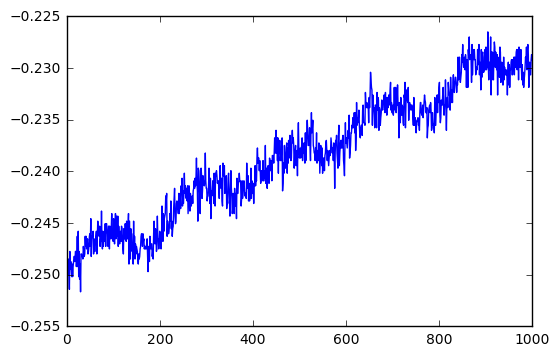

Calculamos transformada.
Realizamos la ransformada inversa:


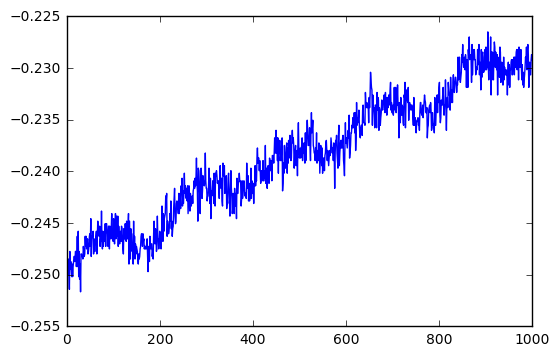

Hemos recuperado la señal original


In [12]:
print ("Señal a utilizar:")
data = pd.read_csv("16h44m02s-04-Jun-2009.txt", sep=" ", header = None)
datos = data.values[:,2]
intervalo = np.linspace(0, 1000, 1000)
plt.plot(intervalo, datos)
plt.show()

print ("Calculamos transformada.")
f = fourier_matrix(datos)

print ("Realizamos la ransformada inversa:")
datos_recupera = fourier_matrix_inv(f)
plt.plot(intervalo, datos_recupera)
plt.show()

print ("Hemos recuperado la señal original")

# Ejercicio 5

## FFT

Señal a utilizar:


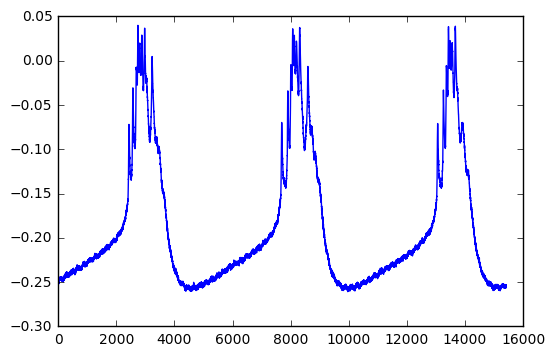

Calculamos fft.
Realizamos la fft inversa:


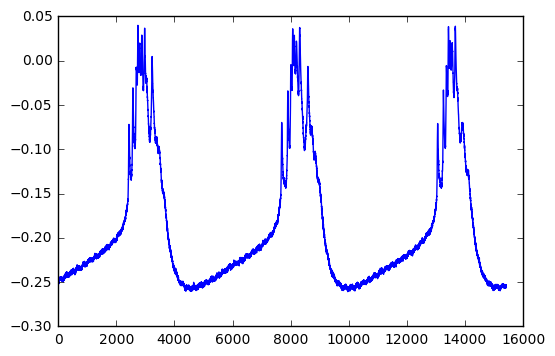

Hemos recuperado la señal original


In [13]:
print ("Señal a utilizar:")
data = pd.read_csv("16h44m02s-04-Jun-2009_full.txt", sep=" ", header = None)
datos = data.values[:,2]
intervalo = np.linspace(0, len(datos), len(datos))
plt.plot(intervalo, datos)
plt.show()

print ("Calculamos fft.")
f = fft(datos)

print ("Realizamos la fft inversa:")
datos_recupera = fft_inv(f)

#Cosilla para eliminar los extra que tuve que meter
datos_recupera2 = []
for i in range(len(datos)):
    datos_recupera2.append(datos_recupera[i])
datos_recupera=datos_recupera2    

intervalo = np.linspace(0, len(datos_recupera), len(datos_recupera))
plt.plot(intervalo, datos_recupera)
plt.show()

print ("Hemos recuperado la señal original")

# Ejercicio 6

## Trend lineal

Señal a utilizar:


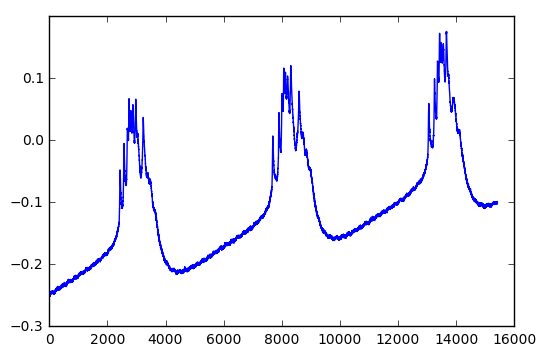

Señal correguida:


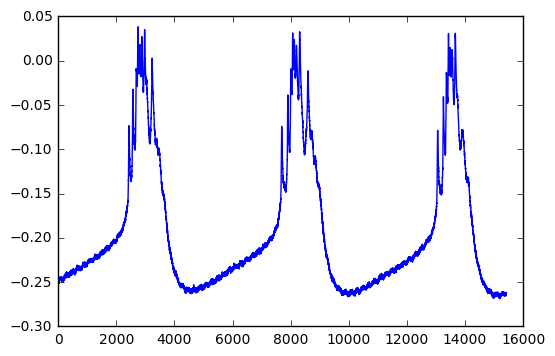

In [14]:
##Señal con trend lineal
data = pd.read_csv("16h44m02s-04-Jun-2009_full.txt", sep=" ", header = None)
datos = data.values[:,2]
for i in range(len(datos)):
    datos[i]=datos[i]+i*0.00001    
intervalo = np.linspace(0, len(datos), len(datos))
plt.plot(intervalo, datos)
print ("Señal a utilizar:")
plt.show()

##Creación del filtro
N=len(datos)

#medias
x_m=0
y_m=0
for i in range(N):
    x_m=x_m+i
    y_m=y_m+datos[i]
x_m = x_m/N
y_m = y_m/N

#a
a1=0
a2=0
for i in range(N):
    a1 = a1 + (i-x_m)*(datos[i]-y_m)
    a2 = a2 + (i-x_m)**2
a=a1/a2

#b
b=y_m-a*x_m

##Señal sin trend lineal
datos2=[]
for i in range(N):
    datos2.append(datos[i]-a*i)
plt.plot(intervalo, datos2)
print ("Señal correguida:")
plt.show()    

# Ejercicio 7

## Trends periodicos

In [4]:
def filtrar(qs, datos_filtrar):
    v=len(qs)
    for i in range(len(datos_filtrar)):
        if i>v:
            suma=0
            for j in range(v):
                suma = suma + (qs[j]*datos_filtrar[i-j-1]/v)
            datos_filtrar[i] = datos_filtrar[i] - suma
    return datos_filtrar

Señal a filtrar:


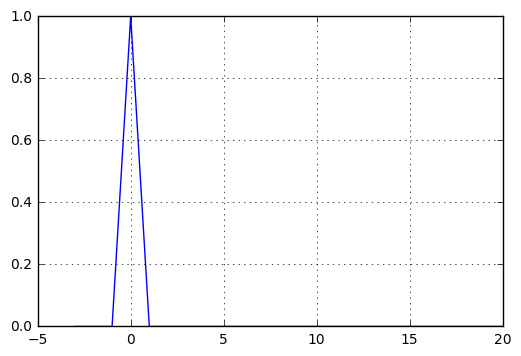

Señal filtrada con q1=2 y q2=-1:


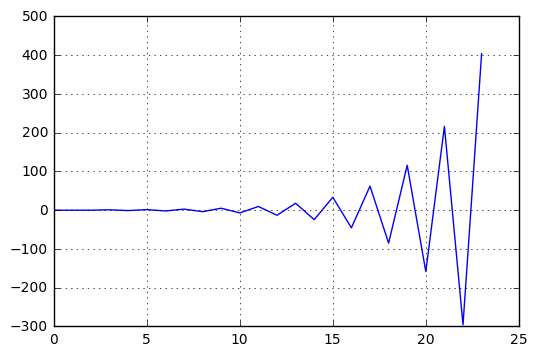

Señal filtrada con q1=-2 y q2=1:


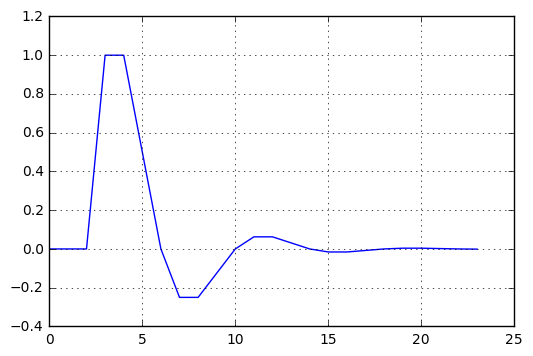

In [54]:
#Función a trozos
trozos = lambda x: np.piecewise(x, [x<0, x==0, x>0], [0.0, 1.0, 0.0])
intervalo = np.linspace(-3, 20, 24)
plt.plot(intervalo, trozos(intervalo))
plt.grid(True) 
print ("Señal a filtrar:")
plt.show()

print ("Señal filtrada con q1=2 y q2=-1:")
datos = filtrar([2, -1],trozos(intervalo) )
plt.plot(datos)
plt.grid(True) 
plt.show()

print ("Señal filtrada con q1=-2 y q2=1:")
datos = filtrar([-2, 1],trozos(intervalo) )
plt.plot(datos)
plt.grid(True) 
plt.show()

# Ejercicio 8

## Diseño de filtros

Señal a utilizar:


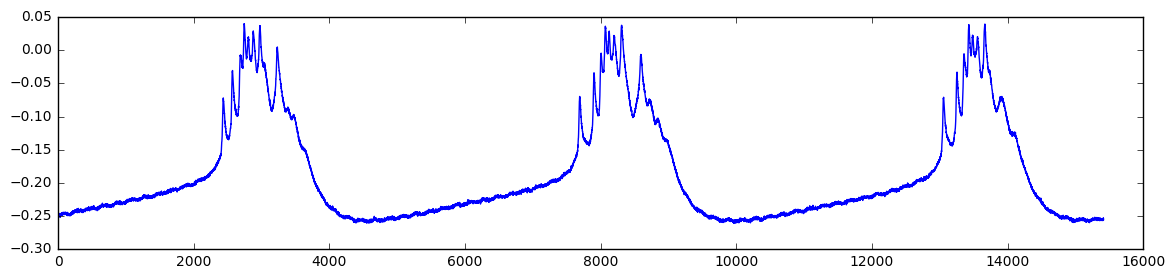

Tamaño señal=16384
Calculadas q:
[1.0000807558748996, 0.7811307350427451, 0.29227103878950367, -0.1145671359372632]
Resultado:


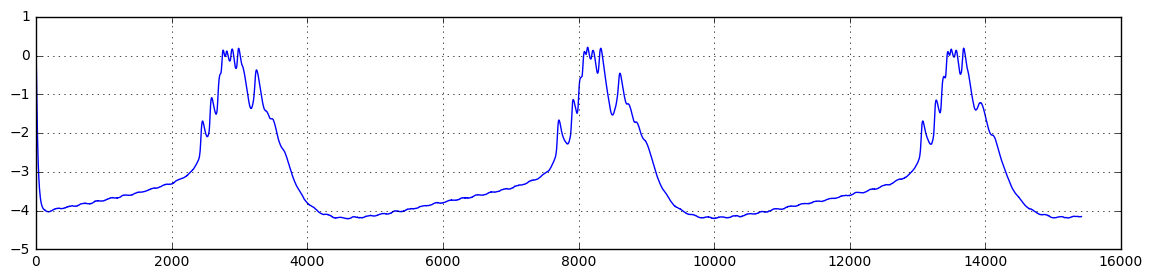

In [63]:
print ("Señal a utilizar:")
data = pd.read_csv("16h44m02s-04-Jun-2009_full.txt", sep=" ", header = None)
datos = data.values[:,2]
#Como usamos ftt tiene que ser potencia de 2
plt.figure(figsize=(14,3))
plt.plot(datos)
plt.show()
aux=len(datos)
while( not is_power2(len(datos)) ):
        datos = np.append (datos, 0)
        
##CREACION DEL FILTRO 
print ("Tamaño señal="+str(len(datos))) ##16384
filtro=[]
for i in range(3096):
    filtro.append(1.0+0j)
for i in range(10192):
    filtro.append(0.0+0j)
for i in range(3096):
    filtro.append(1.0+0j)

filtro2 = fft_inv(filtro)
s=0.0
for i in range(len(filtro2)):
    s = s + filtro2[i].real**2.0
    
qq=[]
for i in range(4):
    qq.append(filtro2[i].real/s)
print ("Calculadas q:")
print qq

ret = []
ret = filtrar(qq, datos)

##PROCESO
for x in range(1):
    for i in range(len(datos)):
        if i>len(qq):
            datos[i]=datos[i]*qq[0]
            for j in range(len(qq)-1):
                datos[i]+=datos[i-j-1]*qq[j+1]

##RESULTADOS
ret2 = []
i=0
while len(ret2)<aux:
    ret2.append(ret[i])
    i=i+1
plt.figure(figsize=(14,3))
plt.plot(ret2)
plt.grid(True) 
print ("Resultado:")
plt.show()

## Seno ruidoso

Generamos un seno ruidoso:


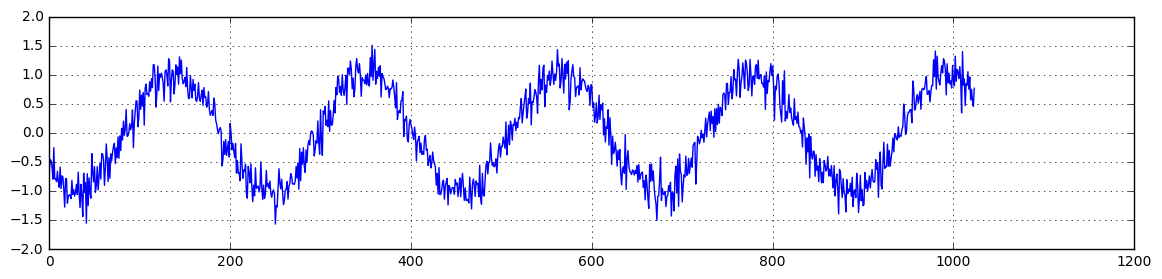

Tamaño señal=1024
Calculadas q:
[1.001251564455578, 0.7681969666397207, 0.25879532754729556, -0.1398136920196783]
Resultado:


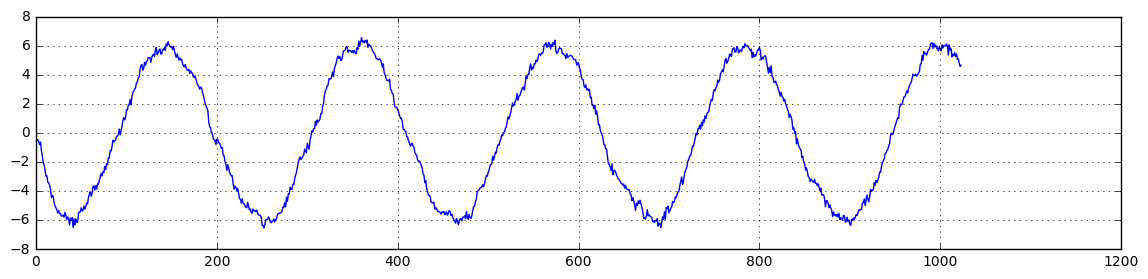

In [64]:
##DATOS
noise = np.random.normal(0,0.2,1024)
x = np.linspace(-15,15,1024) # Intervalo y puntos
seno = np.sin(x)
for i in range(len(noise)):
    seno[i]=seno[i]+noise[i]
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True) 
print ("Generamos un seno ruidoso:")
plt.show()
#Preparar para usar fft
datos = seno
aux=len(datos)
while( not is_power2(len(datos)) ):
        datos = np.append (datos, 0)
        
##CREACION DEL FILTRO 
print ("Tamaño señal="+str(len(datos))) #1024
filtro=[]
for i in range(200):
    filtro.append(1.0+0j)
for i in range(624):
    filtro.append(0.0+0j)
for i in range(200):
    filtro.append(1.0+0j)

filtro2 = fft_inv(filtro)
s=0.0
for i in range(len(filtro2)):
    s = s + filtro2[i].real**2.0
    
qq=[]
for i in range(4):
    qq.append(filtro2[i].real/s)
print ("Calculadas q:")
print qq

ret = []
ret = filtrar(qq, datos)

##PROCESO
for x in range(1):
    for i in range(len(datos)):
        if i>len(qq):
            datos[i]=datos[i]*qq[0]
            for j in range(len(qq)-1):
                datos[i]+=datos[i-j-1]*qq[j+1]

##RESULTADOS
ret2 = []
i=0
while len(ret2)<aux:
    ret2.append(ret[i])
    i=i+1
plt.figure(figsize=(14,3))
plt.plot(ret2)
plt.grid(True) 
print ("Resultado:")
plt.show()

# Ejercicio 9

## Wavelet

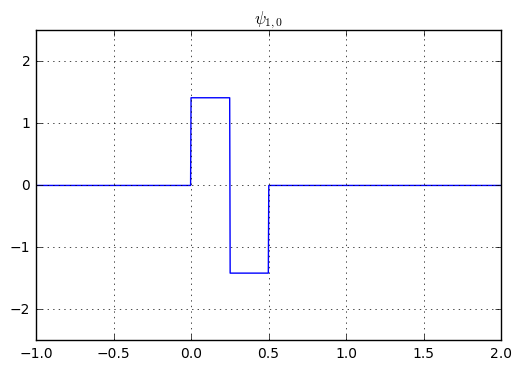

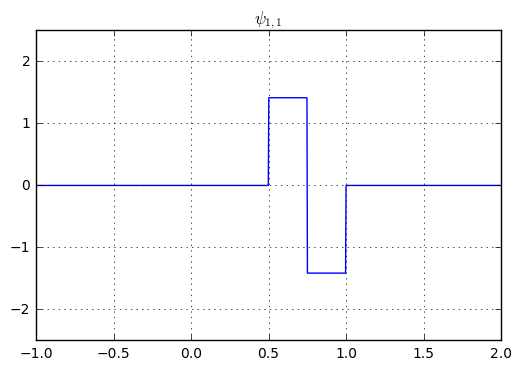

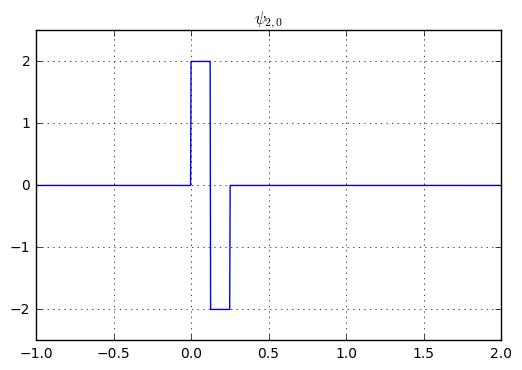

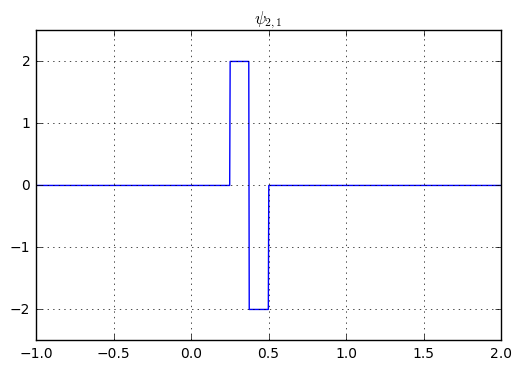

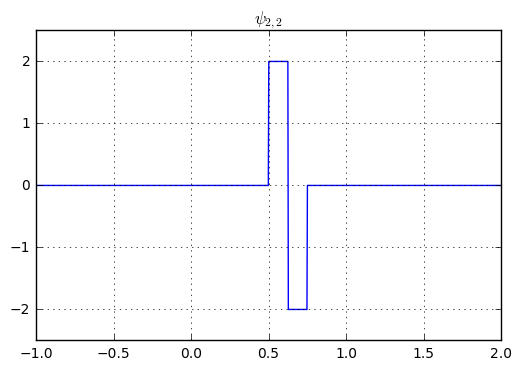

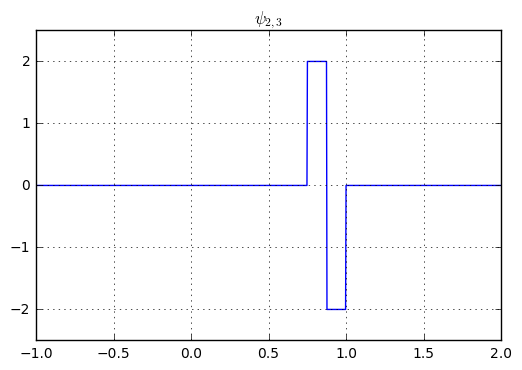

In [19]:
def wavelet(intervalo, j, k):
    c=2.0**(j/2.0)
    trozos = lambda x: np.piecewise(x, [((2**j)*x-k)<0.0, (((2**j)*x-k)<0.5) & (0.0<=((2**j)*x-k)), (((2**j)*x-k)>=0.5) & (((2**j)*x-k)<1.0), ((2**j)*x-k)>=1.0], [0.0, c*1.0, c*-1.0, 0.0])
    plt.plot(intervalo, trozos(intervalo))
    plt.grid(True) 
    plt.ylim([-2.5, 2.5])
    text=str(j)+","+str(k)
    plt.title("$\psi_{"+text+"}$")
    plt.show()

wavelet(np.linspace(-1, 2, 1000), 1, 0) 
wavelet(np.linspace(-1, 2, 1000), 1, 1) 
wavelet(np.linspace(-1, 2, 1000), 2, 0) 
wavelet(np.linspace(-1, 2, 1000), 2, 1) 
wavelet(np.linspace(-1, 2, 1000), 2, 2) 
wavelet(np.linspace(-1, 2, 1000), 2, 3) 

# Extra

## Suavizado básico de señal
La base es la misma, una convolución, pero aqui lo hago más sencillo (sin entrar en espacio de frecuencias)

Generamos un seno ruidoso:


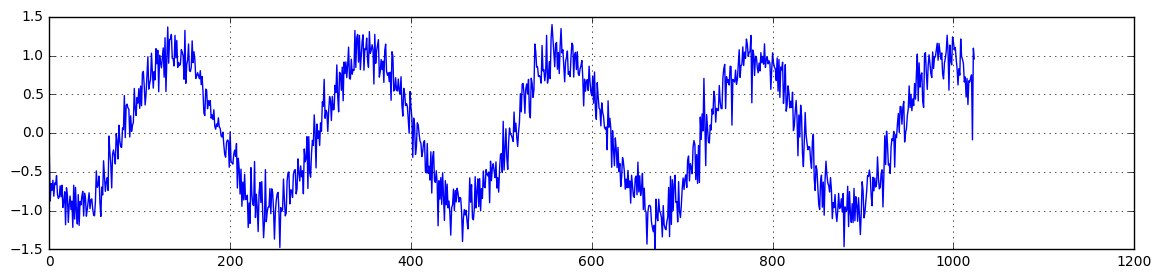

Señal filtrada:


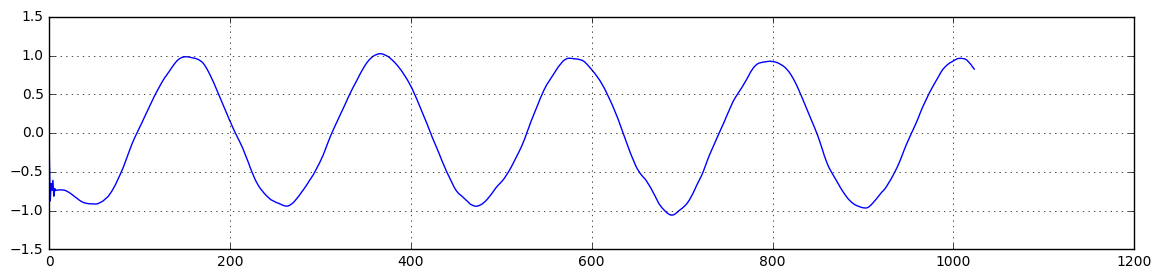

In [31]:
##PREPARAMOS DATOS
noise = np.random.normal(0,0.2,1024) #Ruido
x = np.linspace(-15,15,1024) # Intervalo y puntos
seno = np.sin(x)
for i in range(len(noise)):
    seno[i]=seno[i]+noise[i] #Añadimos el ruido
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True) 
print ("Generamos un seno ruidoso:")
plt.show()

##PROCESO
for b in range(4): #Número de pasadas
    for i in range(len(seno)):
        if i>5:
            seno[i]=seno[i]*0.3+seno[i-1]*0.3+seno[i-2]*0.3+seno[i-3]*0.1

##PINTAMOS RESULTADOS
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True) 
print ("Señal filtrada:")
plt.show()

Señal biológica:


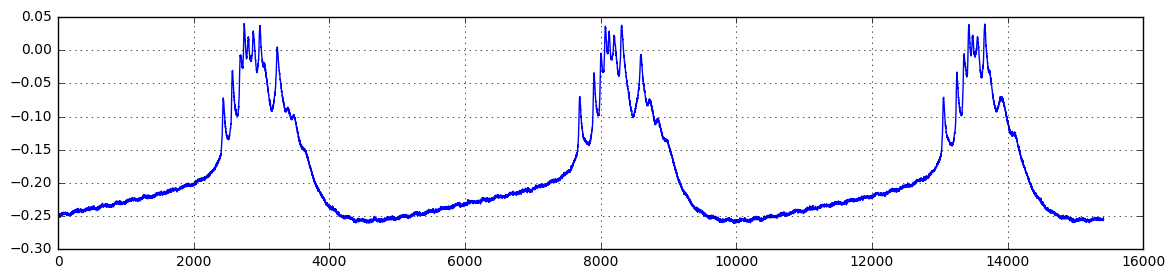

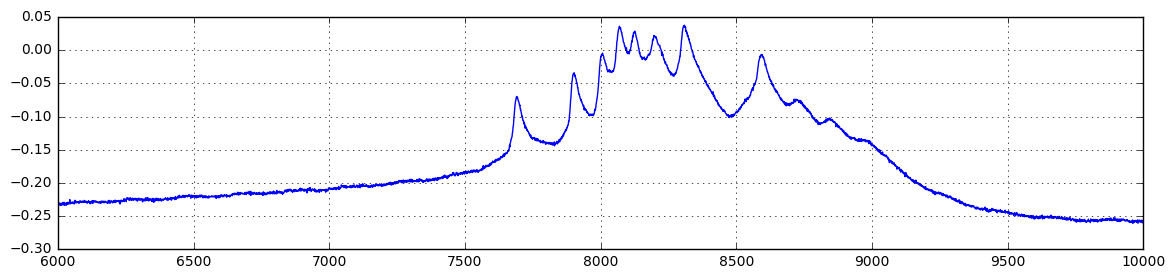

Señal biológica suavizada:


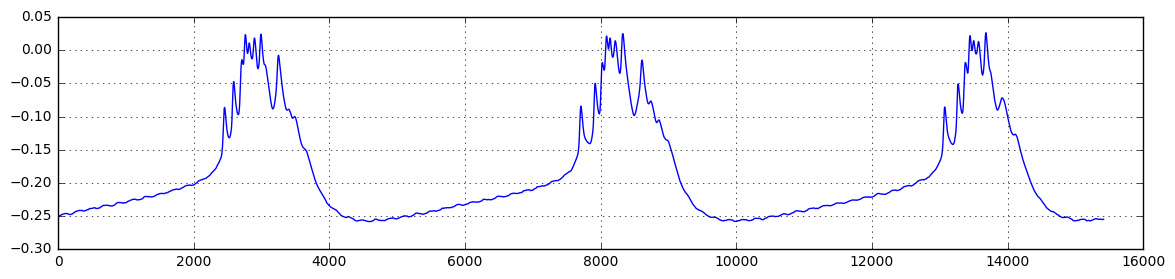

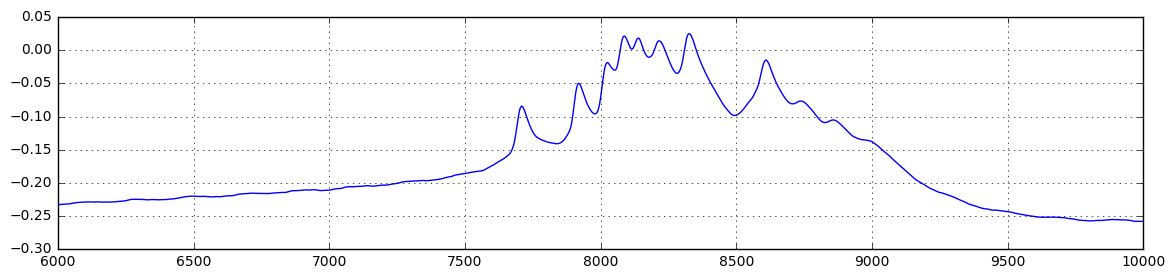

In [38]:
##PREPARAMOS DATOS
data = pd.read_csv("16h44m02s-04-Jun-2009_full.txt", sep=" ", header = None)
seno = data.values[:,2]
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True) 
print ("Señal biológica:")
plt.show()
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True)
plt.xlim([6000, 10000])
plt.show()

##PROCESO
for b in range(4):
    for i in range(len(seno)):
        if i>5:
            seno[i]=seno[i]*0.3+seno[i-1]*0.3+seno[i-2]*0.3+seno[i-3]*0.1

##PINTAMOS RESULTADOS
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True) 
print ("Señal biológica suavizada:")
plt.show()
plt.figure(figsize=(14,3))
plt.plot(seno)
plt.grid(True)
plt.xlim([6000, 10000])
plt.show()